In [1]:
from src.config import *

import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

from joblib import dump, load

## __1. Разбиение данных и обучение модели__

In [2]:
df = pd.read_pickle(os.path.join(PROCESSED_PATH, "all_results.pkl"))

In [3]:
features = ['Age', 'Bwt', 'Best Squat', 'Best Deadlift']

In [4]:
X = df[features]
y = df['Best Bench']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [6]:
model = LinearRegression()

In [7]:
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [8]:
y_pred = model.predict(X_test)
y_pred

array([198.04892319, 159.96732363, 181.62730215, 132.80315381,
       162.80155562, 142.78103746, 144.54353323, 124.4031422 ,
       226.54080128,  96.39277805, 165.80896835, 161.07119783,
       163.739938  , 168.01292027, 160.61192959, 136.1243238 ,
       129.23961338, 168.0389875 , 180.88620117, 128.07141932,
       208.03311208, 169.30747411, 159.49471397, 164.74380622,
       137.92421211, 155.97024827, 159.68892173, 162.77104308,
       157.99357844, 223.09219166, 161.78227873, 165.05630119,
       147.8357452 , 147.9354542 , 147.13846258, 118.19340647,
       167.0546796 , 189.15303568, 144.10621641,  98.02732731,
       152.73554387, 164.52191188, 128.3087595 , 134.75534081,
       173.43303538, 136.08612396, 177.20298211, 185.84656999,
       142.55771391, 154.99503757, 170.94661685, 128.02329016,
       151.12136464, 187.95287323, 139.21517755, 116.6999649 ,
       101.31542863, 248.24145235, 165.61017789, 181.01525254,
       157.1343072 , 104.68503791, 182.04289121, 178.49

## __2. Расчёт метрик__

In [9]:
df['Best Bench'].mean()

np.float64(156.08550287356323)

<Axes: xlabel='Best Bench', ylabel='Count'>

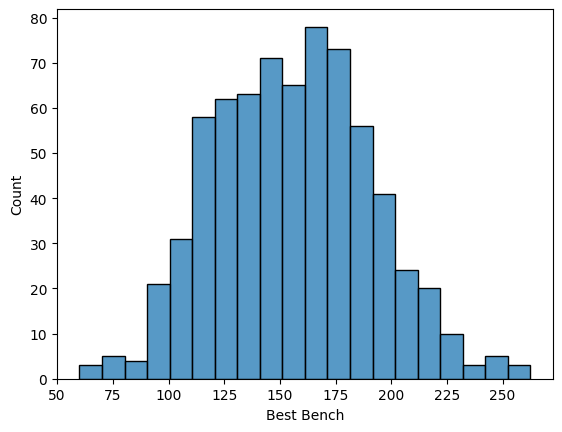

In [10]:
sns.histplot(
    data=df,
    x='Best Bench',
    bins=20
)

In [11]:
mae = mean_absolute_error(y_true=y_test, y_pred=y_pred)
mae

16.134626387629165

In [12]:
rmse = np.sqrt(mean_squared_error(y_true=y_test, y_pred=y_pred))
rmse

np.float64(21.47464560868362)

## __3. Анализ остатков__

In [13]:
test_residuals = y_test - y_pred
test_residuals.head()

674     9.451077
314    25.032676
611    -4.127302
431    -5.303154
552    44.698444
Name: Best Bench, dtype: float64

График остатков не описывается кривой:

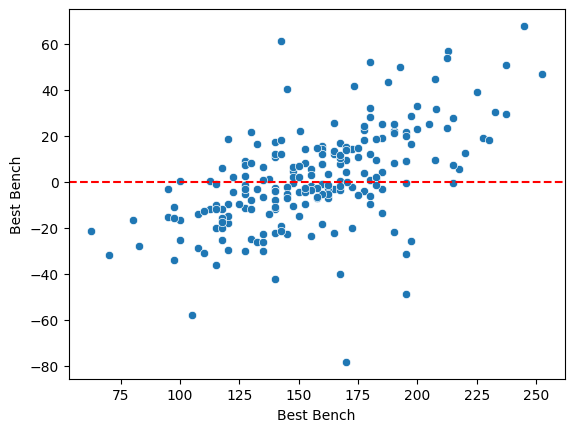

In [14]:
sns.scatterplot(x=y_test, y=test_residuals)
plt.axhline(y=0, c='r', ls='--')

Распределение близко к нормальному:

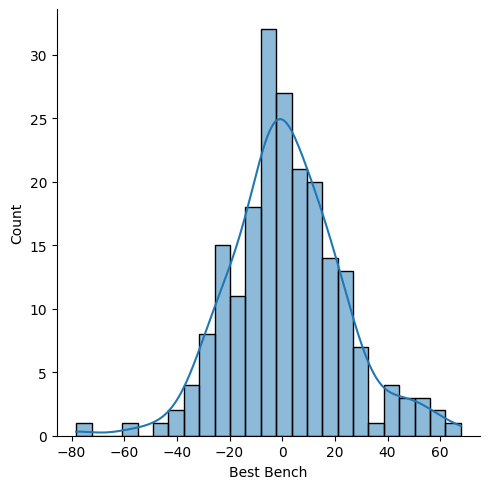

In [15]:
sns.displot(
    test_residuals,
    bins=25,
    kde=True
)

In [16]:
import scipy as sp

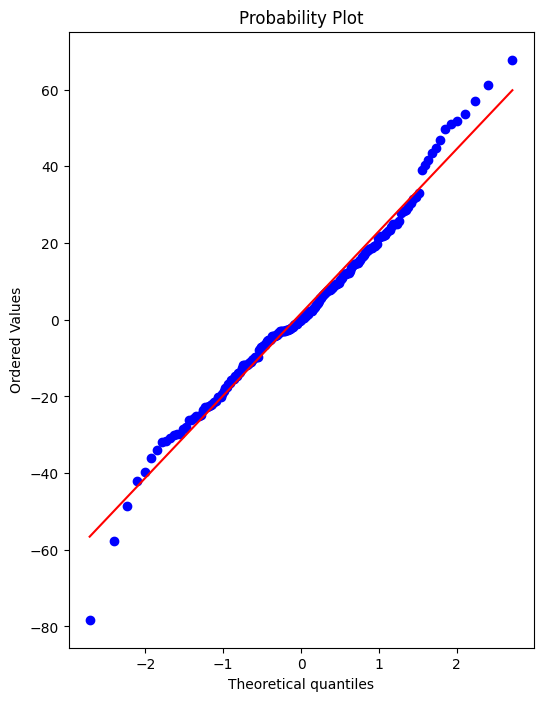

In [17]:
fig, ax = plt.subplots(figsize=(6, 8), dpi=100)
_ = sp.stats.probplot(test_residuals, plot=ax)

## __4. Финальное обучение и сохранение__

In [18]:
final_model = LinearRegression()

In [19]:
final_model.fit(X, y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [20]:
final_model.coef_

array([0.00872918, 0.31005168, 0.36569605, 0.08551022])

In [21]:
dump(final_model, os.path.join(MODELS_PATH, "LR_v1.joblib"))

['./models/LR_v1.joblib']